# Lateral inhibition

We create a striatal network, then place two spherical symmetric population units with radie ```r``` containing ```N_pop``` neurons each at a distance ```d``` from each other.

We stimulate the two populations first A, then B, then A and B together and investigate the firing frequency of the two populations.

In [1]:
import os
import numpy as np
network_path = "second_lateral"
snudda_data = "../../../../BasalGangliaData/data"

modified_network_file=os.path.join(network_path, "network-synapses-virtual.hdf5")
duration=5

In [2]:
from snudda import SnuddaInit

n_DSPN = 2000
n_ISPN = 2000
n_FS = 0
n_LTS = 0
n_ChIN = 0

si = SnuddaInit(network_path=network_path, snudda_data=snudda_data, random_seed=12345, honor_stay_inside=False)
si.define_striatum(num_dSPN=n_DSPN, num_iSPN=n_ISPN, num_FS=n_FS, num_LTS=n_LTS, num_ChIN=n_ChIN,
                   volume_type="cube")

# The centre of the cube is [0.00475, 0.004, 0.00775]. num_neurons is optional
si.add_population_unit_density(structure_name="Striatum", neuron_types=["dSPN", "iSPN"], 
                               unit_centre=np.array([0.00475, 0.004, 0.00775]) -np.array([0,50e-6,150e-6]),
                               probability_function="(d < 200e-6)*1", num_neurons=20)
si.add_population_unit_density(structure_name="Striatum", neuron_types=["dSPN", "iSPN"], 
                               unit_centre=np.array([0.00475, 0.004, 0.00775]) -np.array([150e-6,0,0]),
                               probability_function="(d < 200e-6) * 1", num_neurons=20)
 
si.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
Adding neurons: dSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/ispn
No directory $SNUDDA_DATA/neurons/striatum/ngf, skipping NGF cells.
Writing second_lateral/network-config.json


In [3]:
from snudda import Snudda
sn = Snudda(network_path=network_path)
sn.place_neurons()

Placing neurons
Network path: second_lateral
Reading SNUDDA_DATA=../../../../BasalGangliaData/data from second_lateral/network-config.json
Generating 15184 points for second_lateral/mesh/Striatum-cube-mesh-0.0003676388257808005.obj
n_points = 14455, previous close_pairs = 24930
n_points = 13765, previous close_pairs = 20312
n_points = 13114, previous close_pairs = 16764
n_points = 12501, previous close_pairs = 13866
n_points = 11927, previous close_pairs = 11590
n_points = 11391, previous close_pairs = 9640
n_points = 10893, previous close_pairs = 8133
n_points = 10436, previous close_pairs = 6743
n_points = 10019, previous close_pairs = 5618
n_points = 9640, previous close_pairs = 4821
n_points = 9299, previous close_pairs = 4102
n_points = 8994, previous close_pairs = 3458
n_points = 8725, previous close_pairs = 2886
n_points = 8623, previous close_pairs = 2392
n_points = 6429, previous close_pairs = 2194
Filtering 6429 points..
Filtering, keeping inside points: 4957 / 6429
stop_para

Reading SNUDDA_DATA=../../../../BasalGangliaData/data from second_lateral/network-config.json
Population unit 0 has 3960 neurons
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons
Population unit 0 has 3960 neurons
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons


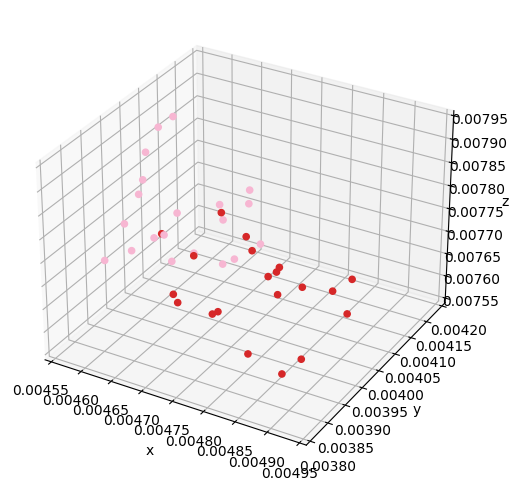

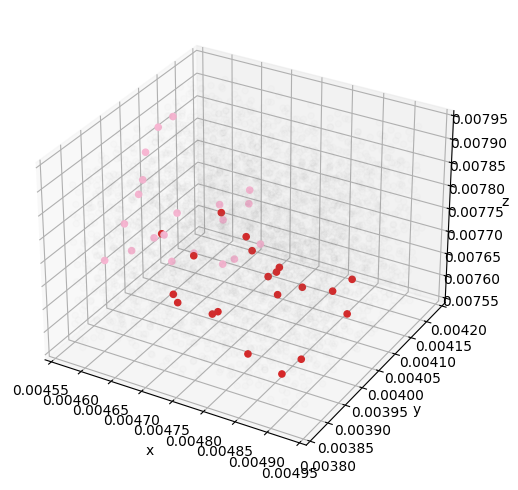

In [4]:
from snudda.plotting import PlotNetwork
pos_file = os.path.join(network_path, "network-neuron-positions.hdf5")

pn = PlotNetwork(pos_file)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

In [5]:
os.system("../start_ipcluster.sh")

Sleeping 20 seconds to wait for workers to start


2024-02-12 18:02:30.105 [IPClusterStart] Starting ipcluster with [daemonize=False]
2024-02-12 18:02:30.380 [IPController] Hub listening on tcp://127.0.0.1:42473 for registration.
2024-02-12 18:02:30.381 [IPController] Hub using DB backend: DictDB
2024-02-12 18:02:30.635 [IPController] hub::created hub
2024-02-12 18:02:30.635 [IPController] writing connection info to /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json
2024-02-12 18:02:30.635 [IPController] writing connection info to /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-engine.json
2024-02-12 18:02:30.635 [IPController] task::using Python leastload Task scheduler
2024-02-12 18:02:30.646 [IPController] Heartmonitor beating every 3000ms
2024-02-12 18:02:30.646 [task] Task scheduler started [leastload]
2024-02-12 18:02:30.646 [broadcast-0] BroadcastScheduler 0 started
2024-02-12 18:02:30.647 [broadcast

To stop ipcluster use:   ipcluster stop


0

In [6]:
sn.detect_synapses(parallel=True)

Touch detection
Network path: second_lateral
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json

Reading SNUDDA_DATA=../../../../BasalGangliaData/data from second_lateral/network-config.json
importing SnuddaDetect from snudda.detect.detect on engine(s)

2024-02-12 18:02:49.946 [IPController] client::client b'\x00k\x8bEk' requested 'connection_request'
2024-02-12 18:02:49.946 [IPController] client::client [b'\x00k\x8bEk'] connected
2024-02-12 18:02:50.104 [IPEngine] Handling apply_request: d8c69930-442613e5669431298b35c9dc_220764_2
2024-02-12 18:02:50.105 [IPEngine] Handling apply_request: d8c69930-442613e5669431298b35c9dc_220764_6
2024-02-12 18:02:50.104 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'd8c69930-442613e5669431298b35c9dc_220764_1' to 0
2024-02-12 18:02:50.104 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'd8c69930-442613e5669431298b35c9dc_220764_2' to 1
2024-02-12 18:02:50.104 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'd8c69930-442613e5669431298b35c9dc_220764_3' to 2
2024-02-12 18:02:50.105 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'd8c69930-442613e5669431298b35c9dc_220764_4' to 3
2024-02-12 18:02:50.105 [IPController] queue::c

2024-02-12 18:02:50.104 [IPEngine] Handling apply_request: d8c69930-442613e5669431298b35c9dc_220764_5
2024-02-12 18:02:50.104 [IPEngine] Handling apply_request: d8c69930-442613e5669431298b35c9dc_220764_1
2024-02-12 18:02:50.104 [IPEngine] Handling apply_request: d8c69930-442613e5669431298b35c9dc_220764_4
2024-02-12 18:02:50.104 [IPEngine] Handling apply_request: d8c69930-442613e5669431298b35c9dc_220764_3
2024-02-12 18:02:50.105 [IPEngine] Handling apply_request: d8c69930-442613e5669431298b35c9dc_220764_7
2024-02-12 18:02:50.110 [IPEngine] Handling apply_request: d8c69930-442613e5669431298b35c9dc_220764_8
2024-02-12 18:02:52.443 [IPController] WARNING | unhandled iopub msg_type: 'comm_open'
2024-02-12 18:02:52.455 [IPController] queue::request 'd8c69930-442613e5669431298b35c9dc_220764_2' completed on 1
2024-02-12 18:02:52.530 [IPController] WARNING | unhandled iopub msg_type: 'comm_open'
2024-02-12 18:02:52.545 [IPController] queue::request 'd8c69930-442613e5669431298b35c9dc_220764_6' c

importing ProjectionDetection from snudda.detect.projection_detection on engine(s)


2024-02-12 18:03:02.150 [IPEngine] Handling apply_request: d8c69930-442613e5669431298b35c9dc_220764_115
2024-02-12 18:03:02.156 [IPEngine] Handling execute_request: d8c69930-442613e5669431298b35c9dc_220764_123
2024-02-12 18:03:02.149 [IPEngine] Handling apply_request: d8c69930-442613e5669431298b35c9dc_220764_120
2024-02-12 18:03:02.150 [IPEngine] Handling apply_request: d8c69930-442613e5669431298b35c9dc_220764_119
2024-02-12 18:03:02.149 [IPEngine] Handling apply_request: d8c69930-442613e5669431298b35c9dc_220764_118
2024-02-12 18:03:02.156 [IPEngine] Handling execute_request: d8c69930-442613e5669431298b35c9dc_220764_126
2024-02-12 18:03:02.163 [IPEngine] Handling execute_request: d8c69930-442613e5669431298b35c9dc_220764_134
2024-02-12 18:03:02.170 [IPEngine] Handling apply_request: d8c69930-442613e5669431298b35c9dc_220764_142
2024-02-12 18:03:02.178 [IPEngine] Handling execute_request: d8c69930-442613e5669431298b35c9dc_220764_150
2024-02-12 18:03:02.184 [IPEngine] Handling apply_reques

Suppressing printouts for hyper voxels that complete in < 100 seconds.


2024-02-12 18:03:16.997 [IPController] queue::request 'd8c69930-442613e5669431298b35c9dc_220764_232' completed on 7
2024-02-12 18:03:17.006 [IPEngine] Handling apply_request: d8c69930-442613e5669431298b35c9dc_220764_233
2024-02-12 18:03:17.018 [IPEngine] Handling apply_request: d8c69930-442613e5669431298b35c9dc_220764_234
2024-02-12 18:03:17.020 [IPEngine] Handling execute_request: d8c69930-442613e5669431298b35c9dc_220764_235
2024-02-12 18:03:17.006 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'd8c69930-442613e5669431298b35c9dc_220764_233' to 7
2024-02-12 18:03:17.007 [IPController] queue::request 'd8c69930-442613e5669431298b35c9dc_220764_233' completed on 7
2024-02-12 18:03:17.015 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'd8c69930-442613e5669431298b35c9dc_220764_234' to 7
2024-02-12 18:03:17.017 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'd8c69930-442613e5669431298b35c9dc_220764_235' to 7
2024-02-12 18:03:17.01

HyperID 86 completed - 16763925 synapses found (173.1 s)
Reading SNUDDA_DATA=../../../../BasalGangliaData/data from second_lateral/network-config.json


2024-02-12 18:05:55.386 [IPController] queue::request 'd8c69930-442613e5669431298b35c9dc_220764_225' completed on 0
2024-02-12 18:05:55.390 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'd8c69930-442613e5669431298b35c9dc_220764_508' to 0
2024-02-12 18:05:55.393 [IPController] queue::request 'd8c69930-442613e5669431298b35c9dc_220764_508' completed on 0
2024-02-12 18:05:55.390 [IPEngine] Handling apply_request: d8c69930-442613e5669431298b35c9dc_220764_508
2024-02-12 18:05:55.396 [IPEngine] Handling apply_request: d8c69930-442613e5669431298b35c9dc_220764_509
2024-02-12 18:05:55.395 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'd8c69930-442613e5669431298b35c9dc_220764_509' to 0
2024-02-12 18:05:55.398 [IPController] queue::request 'd8c69930-442613e5669431298b35c9dc_220764_509' completed on 0
2024-02-12 18:05:55.569 [IPEngine] Handling execute_request: d8c69930-442613e5669431298b35c9dc_220764_511
2024-02-12 18:05:55.569 [IPEngine] Handling execut

stop_parallel disabled, to keep pool running.

Execution time: 207.8s


2024-02-12 18:05:56.494 [IPController] queue::request 'd8c69930-442613e5669431298b35c9dc_220764_512' completed on 2
2024-02-12 18:05:56.500 [IPController] queue::request 'd8c69930-442613e5669431298b35c9dc_220764_513' completed on 3
2024-02-12 18:05:56.501 [IPController] queue::request 'd8c69930-442613e5669431298b35c9dc_220764_511' completed on 1
2024-02-12 18:05:56.517 [IPController] queue::request 'd8c69930-442613e5669431298b35c9dc_220764_516' completed on 6
2024-02-12 18:05:56.523 [IPController] queue::request 'd8c69930-442613e5669431298b35c9dc_220764_514' completed on 4
2024-02-12 18:05:56.525 [IPController] queue::request 'd8c69930-442613e5669431298b35c9dc_220764_515' completed on 5


(<snudda.detect.detect.SnuddaDetect at 0xffff46aff880>,
 <snudda.detect.project.SnuddaProject at 0xffff430c9b20>)

In [7]:
sn.prune_synapses(parallel=True)

2024-02-12 18:05:56.528 [IPController] queue::request 'd8c69930-442613e5669431298b35c9dc_220764_517' completed on 7
2024-02-12 18:05:56.543 [IPController] queue::request 'd8c69930-442613e5669431298b35c9dc_220764_510' completed on 0
2024-02-12 18:05:56.561 [IPController] client::client b'\x00k\x8bEl' requested 'connection_request'
2024-02-12 18:05:56.561 [IPController] client::client [b'\x00k\x8bEl'] connected
2024-02-12 18:05:56.701 [IPEngine] Handling apply_request: 0ed33ace-faceee4ee6bf7eb43fcb7623_220764_5
2024-02-12 18:05:56.714 [IPEngine] Handling apply_request: 0ed33ace-faceee4ee6bf7eb43fcb7623_220764_13
2024-02-12 18:05:56.700 [IPEngine] Handling apply_request: 0ed33ace-faceee4ee6bf7eb43fcb7623_220764_1
2024-02-12 18:05:56.714 [IPEngine] Handling apply_request: 0ed33ace-faceee4ee6bf7eb43fcb7623_220764_9
2024-02-12 18:05:56.702 [IPEngine] Handling apply_request: 0ed33ace-faceee4ee6bf7eb43fcb7623_220764_8
2024-02-12 18:05:56.717 [IPEngine] Handling apply_request: 0ed33ace-faceee4e

Prune synapses
Network path: second_lateral
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json

No file second_lateral/pruning_merge_info.json
importing SnuddaPrune from snudda.detect.prune on engine(s)


2024-02-12 18:05:56.702 [IPEngine] Handling apply_request: 0ed33ace-faceee4ee6bf7eb43fcb7623_220764_7
2024-02-12 18:05:56.715 [IPEngine] Handling apply_request: 0ed33ace-faceee4ee6bf7eb43fcb7623_220764_15
2024-02-12 18:05:56.724 [IPEngine] Handling apply_request: 0ed33ace-faceee4ee6bf7eb43fcb7623_220764_23
2024-02-12 18:05:56.706 [IPEngine] Handling apply_request: 0ed33ace-faceee4ee6bf7eb43fcb7623_220764_6
2024-02-12 18:05:56.716 [IPEngine] Handling apply_request: 0ed33ace-faceee4ee6bf7eb43fcb7623_220764_14
2024-02-12 18:05:56.724 [IPEngine] Handling apply_request: 0ed33ace-faceee4ee6bf7eb43fcb7623_220764_22
2024-02-12 18:05:56.700 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '0ed33ace-faceee4ee6bf7eb43fcb7623_220764_1' to 0
2024-02-12 18:05:56.700 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '0ed33ace-faceee4ee6bf7eb43fcb7623_220764_2' to 1
2024-02-12 18:05:56.700 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '0ed33ac

prune_synapses_parallel (2147494/41519777 synapses, 5.2% kept): 39.0s
prune_synapses_parallel (0/0 gap_junctions, 0.0% kept): 0.0s


2024-02-12 18:06:55.001 [IPEngine] Handling apply_request: 0ed33ace-faceee4ee6bf7eb43fcb7623_220764_121
2024-02-12 18:06:55.011 [IPEngine] Handling apply_request: 0ed33ace-faceee4ee6bf7eb43fcb7623_220764_129
2024-02-12 18:06:55.019 [IPEngine] Handling apply_request: 0ed33ace-faceee4ee6bf7eb43fcb7623_220764_137
2024-02-12 18:06:55.026 [IPEngine] Handling execute_request: 0ed33ace-faceee4ee6bf7eb43fcb7623_220764_145
2024-02-12 18:06:55.038 [IPEngine] Handling apply_request: 0ed33ace-faceee4ee6bf7eb43fcb7623_220764_153
2024-02-12 18:06:55.047 [IPEngine] Handling apply_request: 0ed33ace-faceee4ee6bf7eb43fcb7623_220764_161
2024-02-12 18:06:55.003 [IPEngine] Handling apply_request: 0ed33ace-faceee4ee6bf7eb43fcb7623_220764_128
2024-02-12 18:06:55.014 [IPEngine] Handling apply_request: 0ed33ace-faceee4ee6bf7eb43fcb7623_220764_136
2024-02-12 18:06:55.020 [IPEngine] Handling apply_request: 0ed33ace-faceee4ee6bf7eb43fcb7623_220764_144
2024-02-12 18:06:55.028 [IPEngine] Handling execute_request: 0

stop_parallel disabled, to keep pool running.

Execution time: 266.7s


2024-02-12 18:06:55.209 [IPEngine] Handling execute_request: 0ed33ace-faceee4ee6bf7eb43fcb7623_220764_172
2024-02-12 18:06:55.208 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '0ed33ace-faceee4ee6bf7eb43fcb7623_220764_169' to 0
2024-02-12 18:06:55.208 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '0ed33ace-faceee4ee6bf7eb43fcb7623_220764_170' to 1
2024-02-12 18:06:55.208 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '0ed33ace-faceee4ee6bf7eb43fcb7623_220764_171' to 2
2024-02-12 18:06:55.208 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '0ed33ace-faceee4ee6bf7eb43fcb7623_220764_172' to 3
2024-02-12 18:06:55.209 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '0ed33ace-faceee4ee6bf7eb43fcb7623_220764_173' to 4
2024-02-12 18:06:55.209 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '0ed33ace-faceee4ee6bf7eb43fcb7623_220764_174' to 5
2024-02-12 18:06:55.209 [IPCon

# Reduce network

Here we reduce the network by making the surrounding neurons virtual.

In [8]:
from snudda.utils.ablate_network import SnuddaAblateNetwork

ab = SnuddaAblateNetwork(network_file=network_path)
pop_unit_0 = ab.snudda_load.get_population_unit_members(population_unit=0)  # Here, surrounding neurons
pop_unit_1 = ab.snudda_load.get_population_unit_members(population_unit=1)
pop_unit_2 = ab.snudda_load.get_population_unit_members(population_unit=2)
# ab.only_keep_neuron_id(neuron_id=set(pop_unit_1).union(set(pop_unit_2)))
ab.make_virtual(pop_unit_0)
ab.write_network(out_file_name=modified_network_file)

Writing to second_lateral/network-synapses-virtual.hdf5
Copying morphologies
Keeping 4000 neurons.


2024-02-12 18:06:55.412 [IPController] queue::request '0ed33ace-faceee4ee6bf7eb43fcb7623_220764_171' completed on 2
2024-02-12 18:06:55.415 [IPController] queue::request '0ed33ace-faceee4ee6bf7eb43fcb7623_220764_172' completed on 3


Making neuron id 0 (dSPN_0) virtual (old ID 0)
Making neuron id 1 (dSPN_0) virtual (old ID 1)
Making neuron id 2 (dSPN_0) virtual (old ID 2)
Making neuron id 3 (dSPN_0) virtual (old ID 3)
Making neuron id 4 (dSPN_1) virtual (old ID 4)
Making neuron id 5 (dSPN_1) virtual (old ID 5)
Making neuron id 6 (dSPN_1) virtual (old ID 6)
Making neuron id 7 (dSPN_1) virtual (old ID 7)
Making neuron id 8 (dSPN_1) virtual (old ID 8)
Making neuron id 9 (dSPN_1) virtual (old ID 9)
Making neuron id 10 (dSPN_2) virtual (old ID 10)
Making neuron id 11 (dSPN_2) virtual (old ID 11)
Making neuron id 12 (dSPN_2) virtual (old ID 12)
Making neuron id 13 (dSPN_3) virtual (old ID 13)
Making neuron id 14 (dSPN_3) virtual (old ID 14)
Making neuron id 15 (dSPN_3) virtual (old ID 15)
Making neuron id 16 (dSPN_3) virtual (old ID 16)
Making neuron id 17 (dSPN_3) virtual (old ID 17)
Making neuron id 18 (iSPN_0) virtual (old ID 18)
Making neuron id 19 (iSPN_0) virtual (old ID 19)
Making neuron id 20 (iSPN_0) virtual (ol

In [9]:
pop_unit_0

array([   0,    1,    2, ..., 3997, 3998, 3999])

Reading SNUDDA_DATA=../../../../BasalGangliaData/data from second_lateral/network-config.json
Population unit 0 has 3960 neurons
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons
Population unit 0 has 3960 neurons
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons


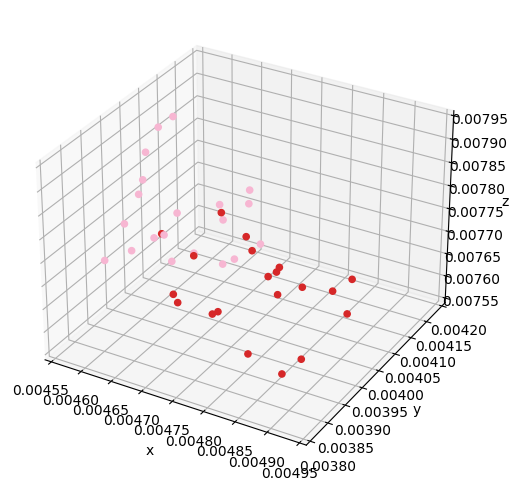

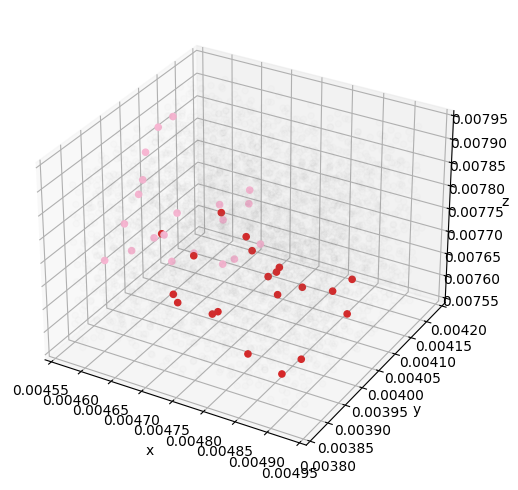

In [10]:
from snudda.plotting import PlotNetwork

pn2 = PlotNetwork(modified_network_file)
pn2.plot_populations(unmarked_alpha=0)
pn2.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn2.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

In [11]:
from snudda.input.virtual_input import VirtualInput
vi = VirtualInput(spike_file="virtual_input_spikes.txt", mapping_file="virtual_input_mapping.txt")

for vidx in pop_unit_0:
    vi.add_input(neuron_id=vidx, spike_times = vi.poisson_spikes(frequency=5, max_time=duration))
    
vi.write_data()

In [12]:
sn.setup_input(network_file=modified_network_file, input_config="input-virtual.json", input_time=duration, parallel=True)

Setting up inputs, assuming input.json exists
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json

Reading SNUDDA_DATA=../../../../BasalGangliaData/data from second_lateral/network-config.json
Writing input spikes to second_lateral/input-spikes.hdf5
Reading SNUDDA_DATA=../../../../BasalGangliaData/data from second_lateral/network-config.json


2024-02-12 18:07:02.122 [IPController] client::client b'\x00k\x8bEm' requested 'connection_request'
2024-02-12 18:07:02.122 [IPController] client::client [b'\x00k\x8bEm'] connected


importing SnuddaInput from snudda.input.input on engine(s)


2024-02-12 18:07:02.610 [IPEngine] Handling apply_request: 18adaeac-68c5242b655941b2b06d7400_220764_1
2024-02-12 18:07:02.629 [IPEngine] Handling apply_request: 18adaeac-68c5242b655941b2b06d7400_220764_9
2024-02-12 18:07:02.611 [IPEngine] Handling apply_request: 18adaeac-68c5242b655941b2b06d7400_220764_6
2024-02-12 18:07:02.611 [IPEngine] Handling apply_request: 18adaeac-68c5242b655941b2b06d7400_220764_4
2024-02-12 18:07:02.629 [IPEngine] Handling apply_request: 18adaeac-68c5242b655941b2b06d7400_220764_12
2024-02-12 18:07:02.631 [IPEngine] Handling apply_request: 18adaeac-68c5242b655941b2b06d7400_220764_20
2024-02-12 18:07:02.611 [IPEngine] Handling apply_request: 18adaeac-68c5242b655941b2b06d7400_220764_5
2024-02-12 18:07:02.629 [IPEngine] Handling apply_request: 18adaeac-68c5242b655941b2b06d7400_220764_13
2024-02-12 18:07:02.616 [IPEngine] Handling apply_request: 18adaeac-68c5242b655941b2b06d7400_220764_8
2024-02-12 18:07:02.629 [IPEngine] Handling apply_request: 18adaeac-68c5242b655

Writing spikes to second_lateral/input-spikes.hdf5


2024-02-12 18:07:04.056 [IPController] queue::request '18adaeac-68c5242b655941b2b06d7400_220764_55' completed on 6
2024-02-12 18:07:04.070 [IPController] queue::request '18adaeac-68c5242b655941b2b06d7400_220764_56' completed on 7
2024-02-12 18:07:04.071 [IPController] queue::request '18adaeac-68c5242b655941b2b06d7400_220764_52' completed on 3
2024-02-12 18:07:04.076 [IPController] queue::request '18adaeac-68c5242b655941b2b06d7400_220764_50' completed on 1
2024-02-12 18:07:04.137 [IPEngine] Handling execute_request: 18adaeac-68c5242b655941b2b06d7400_220764_63
2024-02-12 18:07:04.138 [IPEngine] Handling execute_request: 18adaeac-68c5242b655941b2b06d7400_220764_61
2024-02-12 18:07:04.142 [IPEngine] Handling apply_request: 18adaeac-68c5242b655941b2b06d7400_220764_69
2024-02-12 18:07:04.136 [IPEngine] Handling execute_request: 18adaeac-68c5242b655941b2b06d7400_220764_62
2024-02-12 18:07:04.143 [IPEngine] Handling apply_request: 18adaeac-68c5242b655941b2b06d7400_220764_70
2024-02-12 18:07:04

stop_parallel disabled, to keep pool running.

Execution time: 424.2s


2024-02-12 18:09:32.807 [IPController] queue::request '18adaeac-68c5242b655941b2b06d7400_220764_78' completed on 5
2024-02-12 18:09:32.815 [IPController] queue::request '18adaeac-68c5242b655941b2b06d7400_220764_75' completed on 2
2024-02-12 18:09:32.835 [IPController] queue::request '18adaeac-68c5242b655941b2b06d7400_220764_76' completed on 3
2024-02-12 18:09:32.839 [IPController] queue::request '18adaeac-68c5242b655941b2b06d7400_220764_73' completed on 0
2024-02-12 18:09:32.843 [IPController] queue::request '18adaeac-68c5242b655941b2b06d7400_220764_74' completed on 1
2024-02-12 18:09:32.848 [IPController] queue::request '18adaeac-68c5242b655941b2b06d7400_220764_77' completed on 4
2024-02-12 18:09:32.850 [IPController] queue::request '18adaeac-68c5242b655941b2b06d7400_220764_80' completed on 7


In [13]:
os.system('export IPYTHONDIR="`pwd`/.ipython" && ipcluster stop')

2024-02-12 18:09:32.911 [IPController] queue::request '18adaeac-68c5242b655941b2b06d7400_220764_79' completed on 6
2024-02-12 18:09:33.572 [IPClusterStop] Stopping cluster 
2024-02-12 18:09:33.572 [IPClusterStop] Stopping controller
2024-02-12 18:09:33.573 [IPController] CRITICAL | Received signal 15, shutting down
2024-02-12 18:09:33.574 [IPController] CRITICAL | terminating children...
2024-02-12 18:09:33.798 [IPClusterStart] Controller stopped: {'exit_code': 0, 'pid': 220872, 'identifier': 'ipcontroller-220867'}
2024-02-12 18:09:33.800 [IPClusterStart] WARNING | Controller stopped. Shutting down.
2024-02-12 18:09:33.802 [IPClusterStart] ERROR | IPython cluster: stopping
2024-02-12 18:09:33.803 [IPClusterStart] Stopping engine(s): 1707757351
2024-02-12 18:09:33.825 [IPClusterStop] Stopping engine(s): 1707757351
2024-02-12 18:09:33.804 [IPEngine] CRITICAL | received signal 15, stopping
2024-02-12 18:09:33.857 [IPEngine] CRITICAL | received signal 15, stopping
2024-02-12 18:09:34.247 [

0

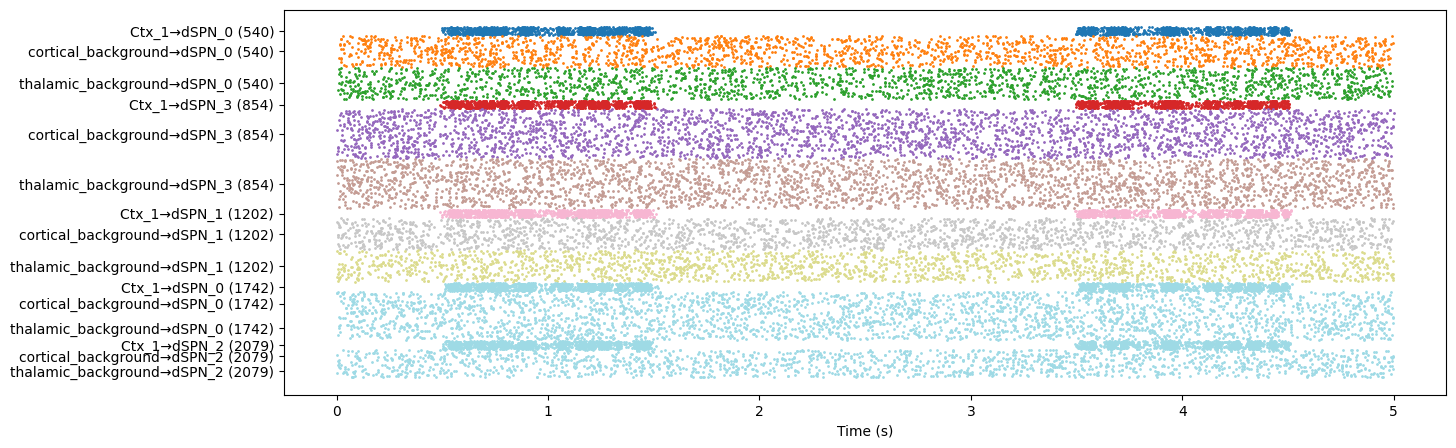

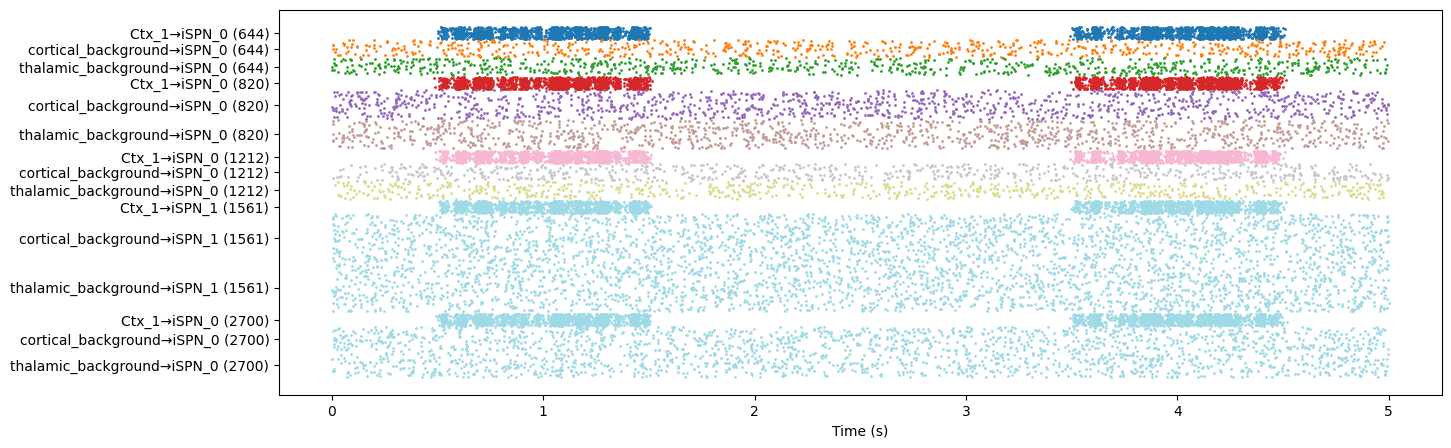

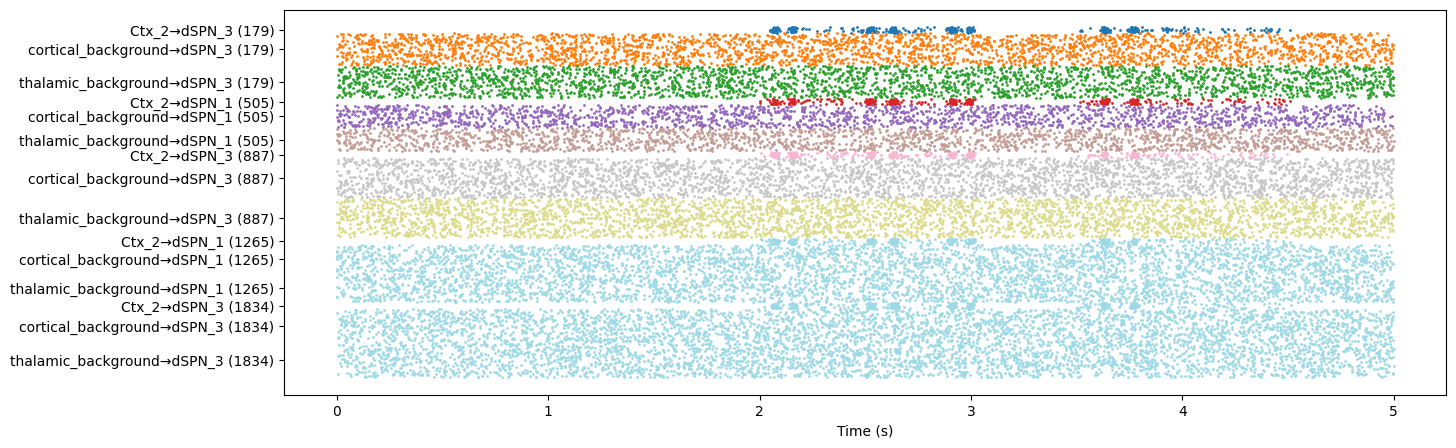

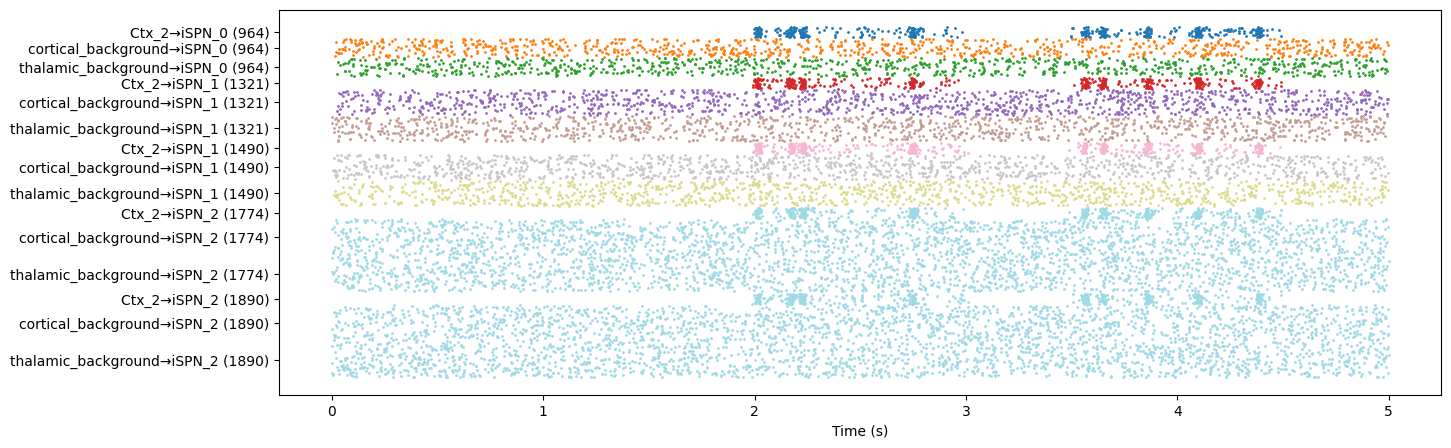

In [14]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, modified_network_file)
spi.plot_input_population_unit(population_unit_id=1, num_neurons=5, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=1, num_neurons=5, neuron_type="iSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=5, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=5, neuron_type="iSPN", fig_size=(15,5))

In [15]:
n_cores=8
os.system(f"mpiexec -n {n_cores} snudda simulate {network_path} --networkFile {modified_network_file} --time {duration}")

args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
numprocs=8
args: Namespace(action='simulate', path='second_lateral', network_file='second_lateral/network-synapses-virtual.hdf5', input_file=None, output_file=None, time=5.0, snudda_data=None, simulation_config=None, record_volt=True, randomseed=None, neuromodulation=None, disable_synapses=None, disable_gj=None, mech_dir=None, profile=False, verbose=False, exportCoreNeuron=False, record_all=None, ipython_profile=None)
args: Namespace(action='simulate', path='second_lateral', network_file='second_lateral/network-synapses-virtual.hdf5', input_file=None, output_file=None, time=5.0, snudda_data=None, simulation_config=None, record_volt=True, randomseed=None, neuromodulation=None, disable_synapses=None, disable_gj=None, mech_dir=None, profile=False, verbose=False, export

0

Loading second_lateral/simulation/output.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 179  287  307  384  498  505  535  540  602  644  767  820  854  870
  887  964 1055 1079 1202 1212 1265 1321 1485 1490 1540 1561 1666 1742
 1774 1834 1890 2079 2361 2465 2533 2555 2596 2700 2722 3136]
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
2465: (dSPN_0, p1863c9a5, mf702205f)
Saving figure to second_lateral/figures/spike-raster.png


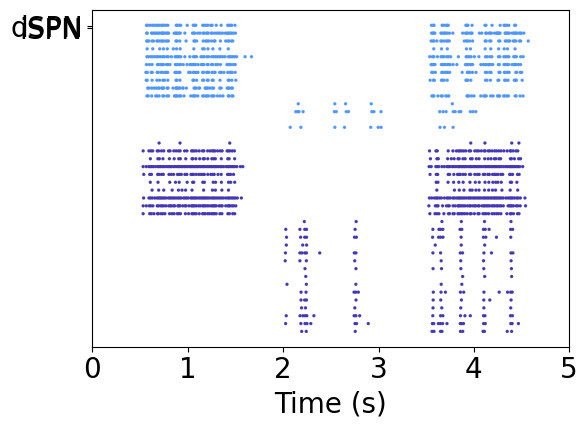

In [16]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path,
                             network_file=modified_network_file)

spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Saving figure second_lateral/figures/spike-frequency-pop-units0-1-2.pdf


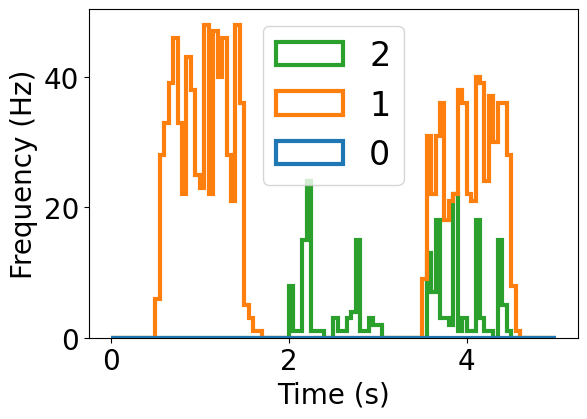

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [17]:
spr.plot_spike_histogram()